<a href="https://colab.research.google.com/github/mmartigani/MachineLearning2/blob/main/ML23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [34]:
df=pd.read_csv('/content/Ventas.csv')
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DíaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [36]:
df.describe()

,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365.000000,365.000000,365.000000,365.000000
mean,4.005479,0.200000,0.142466,2997.219178
std,2.002738,0.400549,0.350007,942.096284
min,1.000000,0.000000,0.000000,1305.000000
25%,2.000000,0.000000,0.000000,2195.000000
50%,4.000000,0.000000,0.000000,3074.000000
75%,6.000000,0.000000,0.000000,3979.000000
max,7.000000,1.000000,1.000000,4404.000000


In [37]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          365 non-null    datetime64[ns]
 1   DíaDeLaSemana  365 non-null    int64         
 2   Promociones    365 non-null    int64         
 3   Festivo        365 non-null    int64         
 4   Ventas         365 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 14.4 KB


In [39]:
escala = MinMaxScaler(feature_range=(0, 1))

# Eliminamos las columnas no deseadas y guardamos los nombres de las columnas que vamos a escalar
columnas_para_escalar = df.drop(["Ventas", "Fecha"], axis=1).columns

# Ajustamos el MinMaxScaler a las columnas restantes y transformamos los datos
normado = escala.fit_transform(df[columnas_para_escalar])

# Creamos un nuevo DataFrame con los datos normalizados y las columnas correctas
df_normado = pd.DataFrame(data=normado, columns=columnas_para_escalar)

# Si necesitas, puedes agregar las columnas no escaladas que has quitado previamente
df_normado["Ventas"] = df["Ventas"]
df_normado["Fecha"] = df["Fecha"]

# Ahora df_normado tiene los datos normalizados y las columnas no normalizadas originales
df_normado.head()


,DíaDeLaSemana,Promociones,Festivo,Ventas,Fecha
0,0.833333,0.0,0.0,4033,2022-01-01
1,1.000000,0.0,1.0,4012,2022-01-02
2,0.000000,0.0,0.0,1608,2022-01-03
3,0.166667,1.0,0.0,2046,2022-01-04
4,0.333333,0.0,0.0,2484,2022-01-05


In [40]:
# Comprobación del tipo de dato de Fecha
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          365 non-null    datetime64[ns]
 1   DíaDeLaSemana  365 non-null    int64         
 2   Promociones    365 non-null    int64         
 3   Festivo        365 non-null    int64         
 4   Ventas         365 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 14.4 KB


In [41]:
# Identificar las variables dependientes e independientes
X = df_normado.drop(['Ventas', 'Fecha'], axis=1)
y = df['Ventas']

In [42]:
# Dividir en conjuntos de entrenamiento y prueba
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.8, random_state=42)

In [43]:
# Estadísticas descriptivas
df.describe()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365,365.000000,365.000000,365.000000,365.000000
mean,2022-07-01 23:59:59.999999744,4.005479,0.200000,0.142466,2997.219178
min,2022-01-01 00:00:00,1.000000,0.000000,0.000000,1305.000000
25%,2022-04-02 00:00:00,2.000000,0.000000,0.000000,2195.000000
50%,2022-07-02 00:00:00,4.000000,0.000000,0.000000,3074.000000
75%,2022-10-01 00:00:00,6.000000,0.000000,0.000000,3979.000000
max,2022-12-31 00:00:00,7.000000,1.000000,1.000000,4404.000000
std,NaN,2.002738,0.400549,0.350007,942.096284


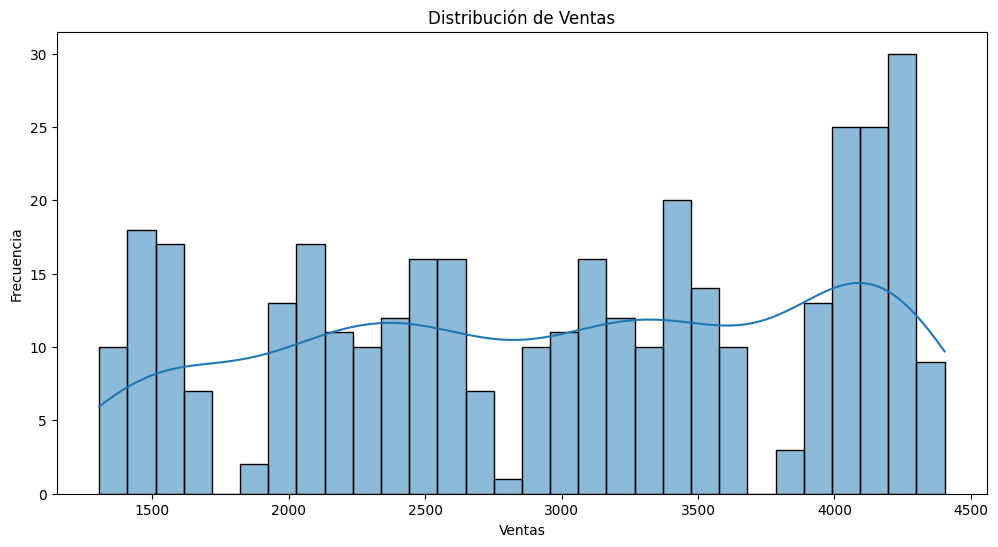

In [44]:
# Visualización de la distribución de ventas
plt.figure(figsize=(12, 6))
sns.histplot(df['Ventas'], bins=30, kde=True)
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia');

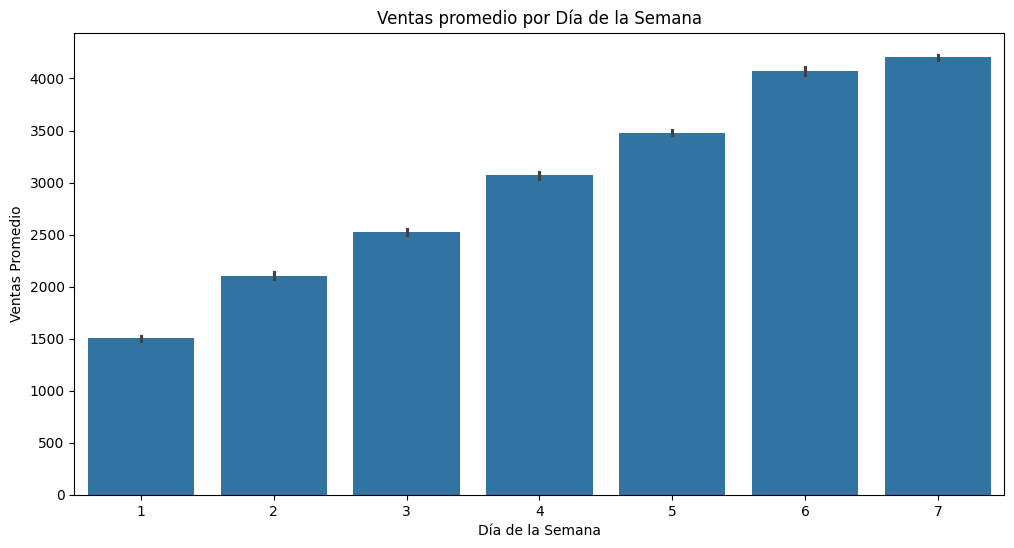

In [45]:
# Relación entre ventas y día de la semana con promedio de ventas
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='DíaDeLaSemana', y='Ventas')
plt.title('Ventas promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Promedio');

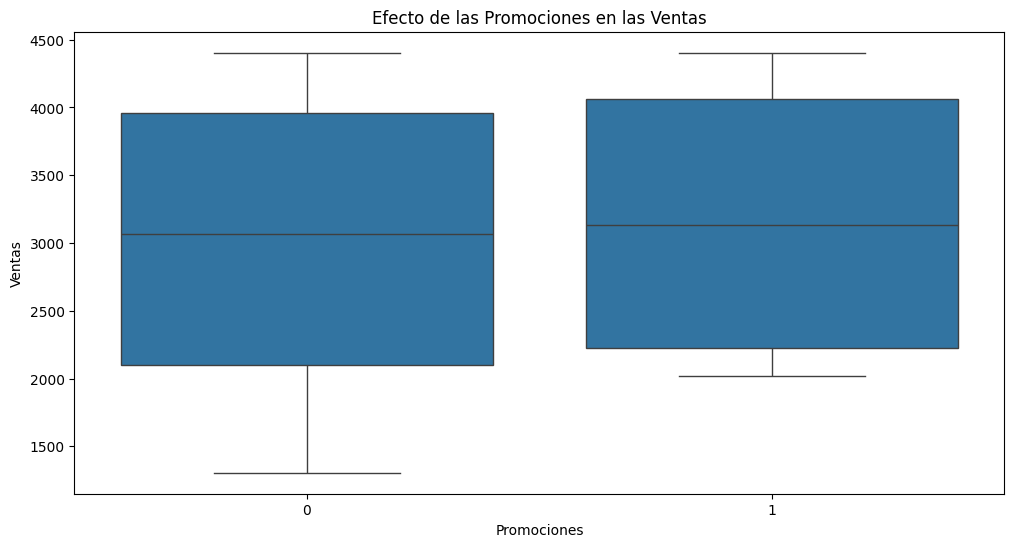

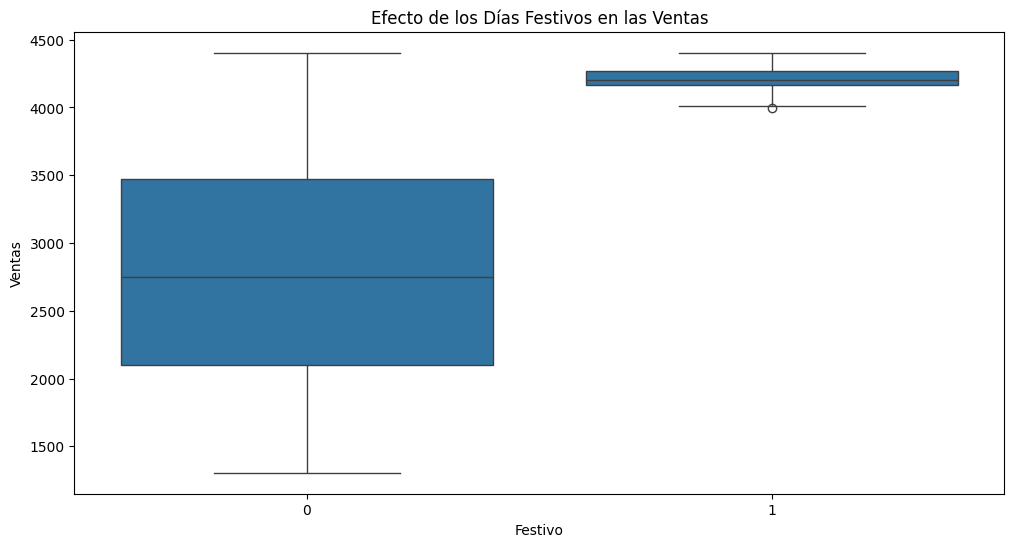

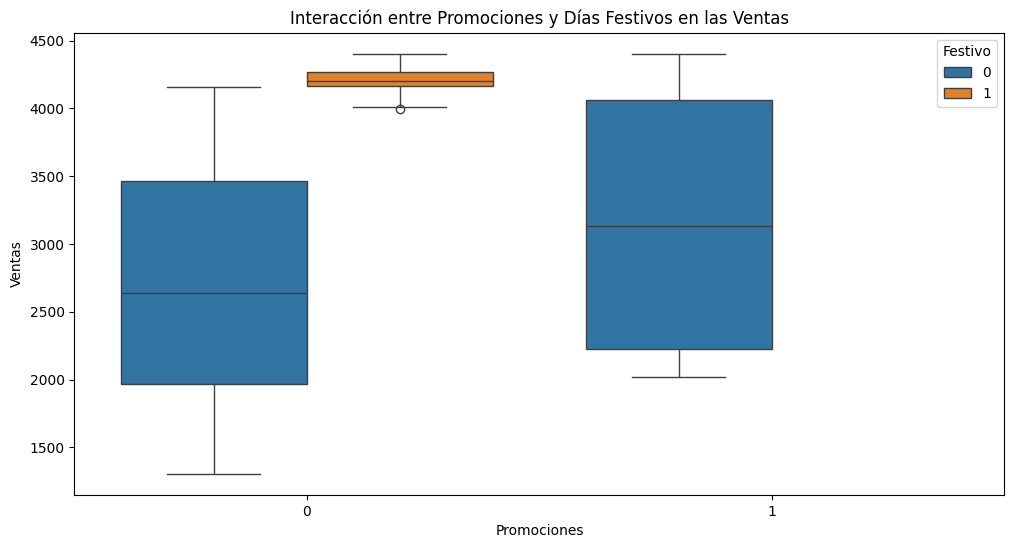

In [46]:
# boxplot para comparar las ventas con y sin promociones.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Promociones', y='Ventas', data=df)
plt.title('Efecto de las Promociones en las Ventas')

# boxplot para comparar las ventas para los días normales y festivos.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Festivo', y='Ventas', data=df)
plt.title('Efecto de los Días Festivos en las Ventas')

# boxplot para ver la interacción entre promociones y días festivos en las ventas.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Promociones', y='Ventas', hue='Festivo', data=df)
plt.title('Interacción entre Promociones y Días Festivos en las Ventas');

In [54]:
# almacenar modelos
modelos = [
    ("modelo lineal", LinearRegression()),
    ("modelo arbol", DecisionTreeRegressor(random_state=42)),
    ("modelo bosque", RandomForestRegressor(random_state=42))
]

In [55]:
# Entrenar modelos y mostrar puntajes
for nombre, modelo in modelos:
    modelo.fit(X_entrena, y_entrena)
    puntaje = modelo.score(X_prueba, y_prueba)
    print(f'{nombre}: {puntaje}')

modelo lineal: 0.9924245101323563
modelo arbol: 0.9923508015371342
modelo bosque: 0.9923097376813321


In [56]:
# Alojamos el modelo de Regresión Lineal en una variable
modelo_lineal = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
modelo_lineal.fit(X_entrena, y_entrena)

# Realizamos predicciones usando el conjunto de prueba
predicciones_lineal = modelo_lineal.predict(X_prueba)

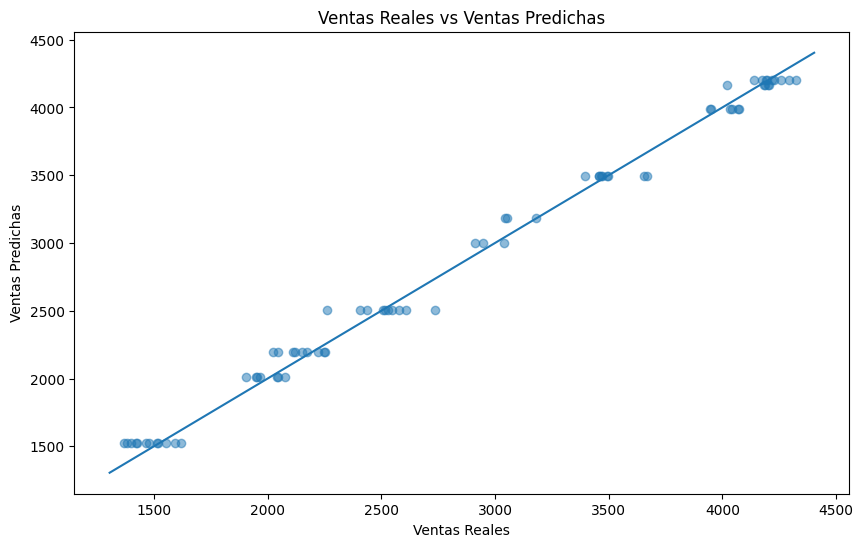

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(y_prueba, predicciones_lineal, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.title('Ventas Reales vs Ventas Predichas');

In [58]:
df_test = pd.DataFrame({'Real': y_prueba, 'Predicho': predicciones_lineal})
df_test = df_test.sort_index()

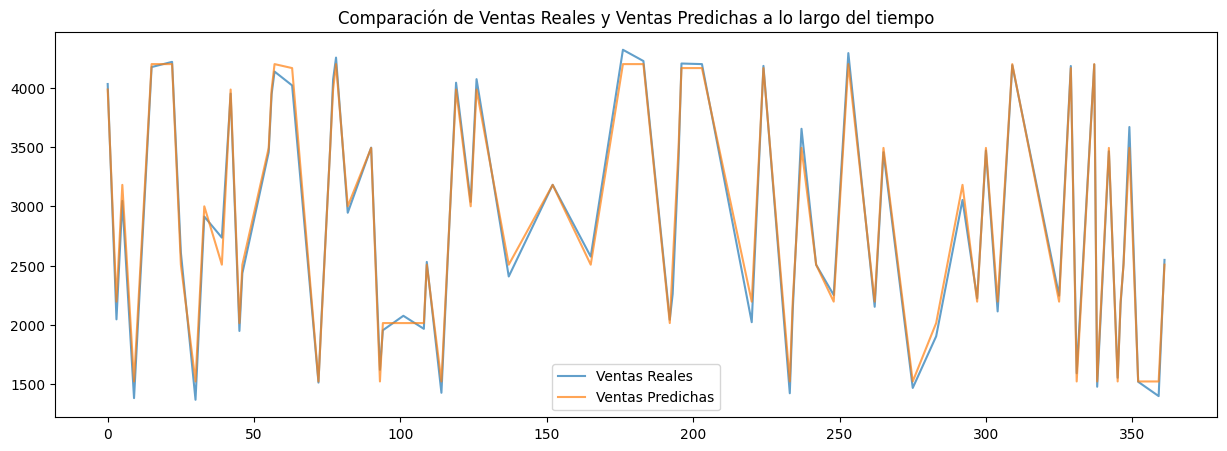

In [59]:
plt.figure(figsize=(15, 5))
plt.plot(df_test['Real'], label='Ventas Reales', alpha=0.7)
plt.plot(df_test['Predicho'], label='Ventas Predichas', alpha=0.7)
plt.legend()
plt.title('Comparación de Ventas Reales y Ventas Predichas a lo largo del tiempo');